In [1]:
import spacy

nlp = spacy.load("pl_core_news_lg")
doc = nlp("Nie pytają cie o imię walczac z ostrym cieniem mgły.")

In [3]:
print("Tokens:")
for token in doc:
    print(f"{token.text:<12} {token.pos_:<10} {token.dep_:<10} {token.head.text:<12} {token.ent_type_:<10}")

Tokens:
Nie          PART       advmod:neg pytają                 
pytają       VERB       ROOT       pytają                 
cie          VERB       obj        pytają                 
o            ADP        case       imię                   
imię         NOUN       obl:arg    pytają                 
walczac      NOUN       iobj       pytają                 
z            ADP        case       cieniem                
ostrym       ADJ        amod       cieniem                
cieniem      NOUN       nmod       walczac                
mgły         NOUN       nmod:arg   cieniem                
.            PUNCT      punct      pytają                 


In [17]:
japko = nlp("jabłko")
jablon = nlp("jabłoń")
jabol = nlp("jabol")

In [18]:
# Check similarity
print("\nSimilarity:")
print(f"jabłko - jabłoń: {japko.similarity(jablon):.4f}")
print(f"jabłko - jabol: {japko.similarity(jabol):.4f}")
print(f"jabłoń - jabol: {jablon.similarity(jabol):.4f}")
# Check similarity with a word not in the vocabulary
print(f"jabłko - nieznane: {japko.similarity(nlp('nieznane')):.4f}")
# Check similarity with a word not in the vocabulary
print(f"jabłoń - jabol: {jablon.similarity(jabol):.4f}")
# Check similiraty with itself
print(f"jabłko - jabłko: {japko.similarity(japko):.4f}")



Similarity:
jabłko - jabłoń: 0.4948
jabłko - jabol: 0.0000
jabłoń - jabol: 0.0000
jabłko - nieznane: 0.0026
jabłoń - jabol: 0.0000
jabłko - jabłko: 1.0000


C:\Users\makdeb\AppData\Local\Temp\ipykernel_20756\2902167144.py:4: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  print(f"jabłko - jabol: {japko.similarity(jabol):.4f}")
C:\Users\makdeb\AppData\Local\Temp\ipykernel_20756\2902167144.py:5: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  print(f"jabłoń - jabol: {jablon.similarity(jabol):.4f}")
C:\Users\makdeb\AppData\Local\Temp\ipykernel_20756\2902167144.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  print(f"jabłoń - jabol: {jablon.similarity(jabol):.4f}")


In [19]:
jablon.vector

array([-1.6216e+00, -2.1407e+00, -2.0764e+00,  2.1404e+00,  5.8539e-01,
        4.3546e-01,  1.1471e+00,  7.3696e-01, -2.9238e-01,  1.2156e+00,
        4.9527e-01, -1.4521e-02, -2.7589e-01, -1.2736e+00,  1.0292e+00,
        4.4868e-01, -1.4677e-01,  1.1175e+00, -5.2238e-01,  1.1070e+00,
       -1.2152e-01,  1.0542e+00,  1.0236e-01,  2.3067e-01, -3.8437e-01,
        1.1433e+00, -2.5108e+00, -7.1832e-01,  2.3968e-02, -2.1566e-01,
        1.1730e+00,  5.5636e-02, -2.1200e+00,  1.7419e+00, -1.7897e+00,
       -9.4009e-01, -1.3471e+00, -7.4155e-01,  2.2705e+00, -7.1929e-01,
       -1.3777e+00, -1.3394e+00, -5.6629e-01,  1.5745e+00, -1.5338e+00,
       -1.3124e+00,  2.5224e+00,  6.3614e-01, -1.0299e+00,  1.6393e+00,
       -5.2954e-01,  5.6022e-01,  2.7759e+00,  1.6077e+00, -3.6609e-01,
        2.2836e+00, -9.4340e-01, -2.0485e+00, -3.9809e-01,  7.1436e-01,
        3.2513e-01, -2.0540e+00,  1.9767e+00,  7.0251e-03,  1.5922e+00,
        7.2819e-01,  2.1653e+00, -2.2789e+00, -5.8732e-01, -2.00

IndexError: index 14 is out of bounds for axis 0 with size 14

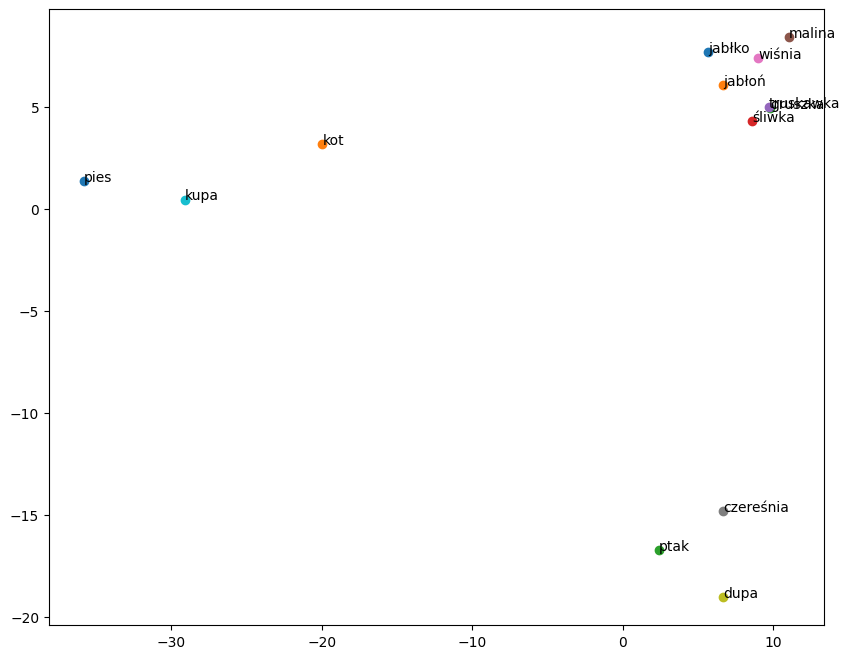

In [25]:
# Plot a few words on a 2D plane
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = [japko, jablon, jabol, nlp("gruszka"), nlp("śliwka"), nlp("truskawka"), nlp("malina"), nlp("wiśnia"), nlp("czereśnia"), nlp("dupa"), nlp("kupa"), nlp("pies"), nlp("kot"), nlp("ptak"), nlp("ryba")]
vectors = [word.vector for word in words if word.has_vector]
if len(vectors) > 0:
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        if word.has_vector:
            plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=word.text)
            plt.annotate(word.text, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

    plt.title("Word Vectors in 2D Space")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid()
    plt.show()


In [60]:
def find_closest_words(word_text, n=10):
    word = nlp.vocab[word_text]
    
    if not word.has_vector:
        print(f"Word '{word.text}' does not have a vector representation.")
        return []
    
    queries = word.vector.reshape(1, -1)
    keys = nlp.vocab.vectors.data
    keys, best_rows, scores = nlp.vocab.vectors.most_similar(queries, n=n + 1)
    # decode keys and best rows to words
    closest_words = []
    for i in range(n):
        closest_word = nlp.vocab.strings[keys[0][i + 1]]
        print(type(closest_word), closest_word)
        closest_words.append((closest_word, scores[0][i + 1]))
    print("+++++++++++++++++++++++++++++++++")
    return closest_words

closest_words = find_closest_words("jabłko")
print(len(closest_words), "closest words found.")
print("\nTen closest words to 'jabłko':")
for word, score in closest_words:
    print(word + f" ({score:.4f})")

<class 'str'> jabłka
<class 'str'> jabłuszko
<class 'str'> Jabłko
<class 'str'> jabłku
<class 'str'> jabłuszka
<class 'str'> jabłkowo
<class 'str'> banany
<class 'str'> pomarańcze
<class 'str'> winogrono
<class 'str'> śliwki
+++++++++++++++++++++++++++++++++
10 closest words found.

Ten closest words to 'jabłko':
jabłka (0.8046)
jabłuszko (0.7241)
Jabłko (0.7032)
jabłku (0.7028)
jabłuszka (0.6747)
jabłkowo (0.6563)
banany (0.6448)
pomarańcze (0.6322)
winogrono (0.6299)
śliwki (0.6287)


<class 'str'> władca
<class 'str'> cesarz
<class 'str'> monarcha
<class 'str'> książę
<class 'str'> królo
<class 'str'> możnowładca
<class 'str'> Król
<class 'str'> Cesarz
<class 'str'> arcyksiążę
<class 'str'> królewicz
+++++++++++++++++++++++++++++++++
<class 'str'> piesek
<class 'str'> kot
<class 'str'> Pies
<class 'str'> czworonóg
<class 'str'> psiak
<class 'str'> pieseł
<class 'str'> kociak
<class 'str'> pupil
<class 'str'> zwierzak
<class 'str'> kundelek
+++++++++++++++++++++++++++++++++
<class 'str'> jednorożcem
<class 'str'> jednorożca
<class 'str'> jednorożce
<class 'str'> Jednorożec
<class 'str'> jednorożców
<class 'str'> jednorożcami
<class 'str'> wieloryb
<class 'str'> słonik
<class 'str'> zwierz
<class 'str'> zajączek
+++++++++++++++++++++++++++++++++
<class 'str'> Matematyka
<class 'str'> matematyczna
<class 'str'> matematyczka
<class 'str'> fizyka
<class 'str'> matematyki
<class 'str'> matematyczno
<class 'str'> matematyczno-
<class 'str'> humanistyka
<class 'str'> lingw

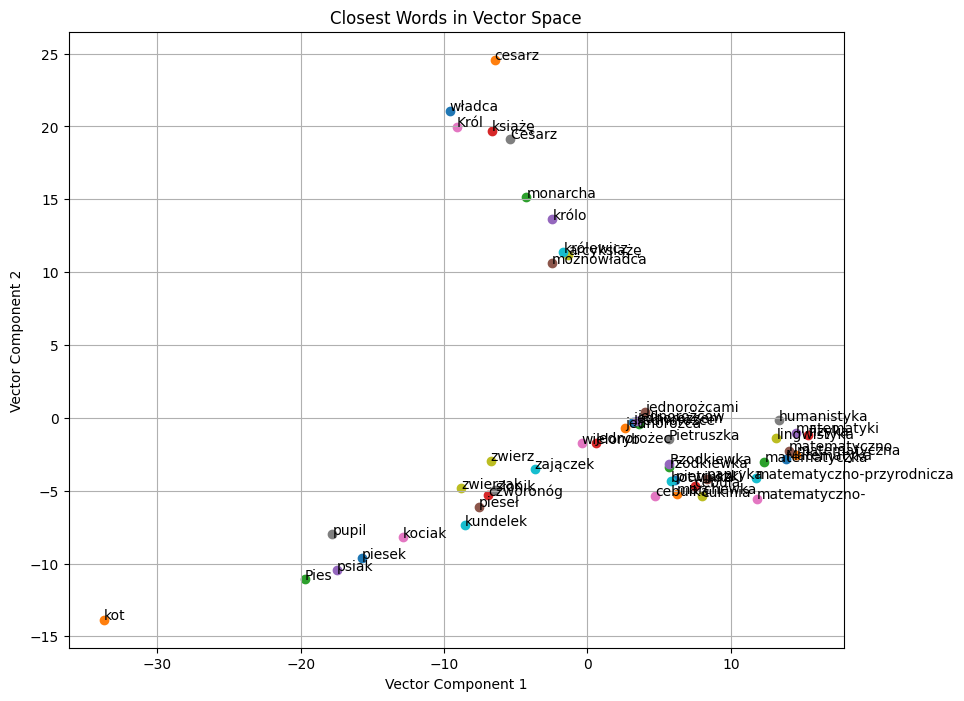

In [61]:
words = [nlp("król"), nlp("pies"), nlp("jednorożec"), nlp("matematyka"), nlp("pietruszka")]
all_closest_words = []
for word in words:
    # Find closest words for each word
    closest_words = find_closest_words(word.text)
    all_closest_words.extend(closest_words)

# Plot all the words and their closest words
if len(closest_words) > 0:
    plt.figure(figsize=(10, 8))
    vectors = [nlp(word[0]).vector for word in all_closest_words if nlp(word[0]).has_vector]
    reduced_vectors = pca.fit_transform(vectors)
    for i, (word, score) in enumerate(all_closest_words):
        if nlp(word).has_vector:
            plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=word)
            plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    

    plt.title("Closest Words in Vector Space")
    plt.xlabel("Vector Component 1")
    plt.ylabel("Vector Component 2")
    # plt.legend()
    plt.grid()
    plt.show()
    